<a href="https://colab.research.google.com/github/MAristyaP/PCVK_Genap_2021/blob/main/Week10_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (4,338 kB/s)
debconf: unable to ini

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

In [4]:
def display(img,cmap='gray'):
 fig = plt.figure(figsize=(12,10))
 ax = fig.add_subplot(111)
 ax.imshow(img,cmap='gray')

In [5]:
from pytesseract import Output
img = cv.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


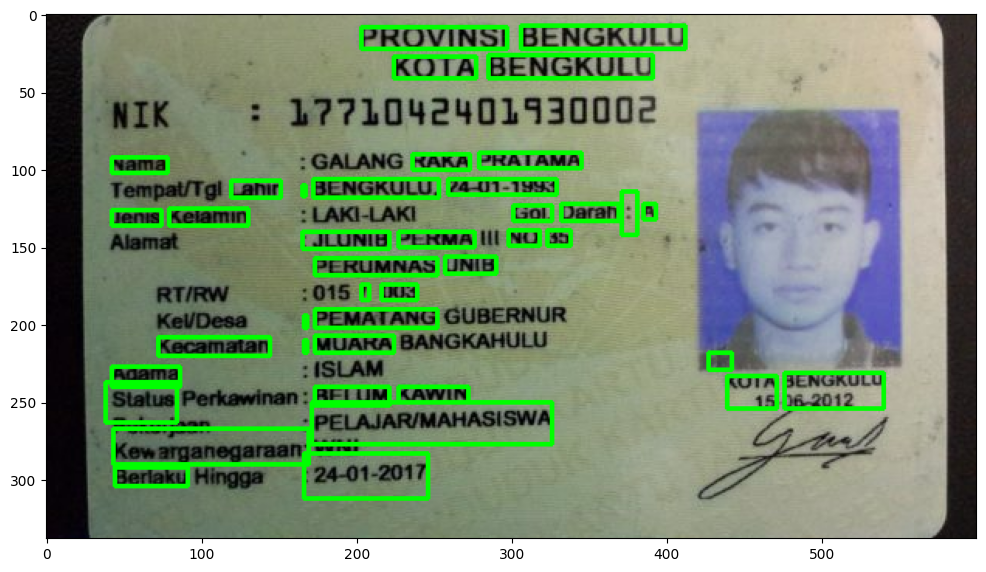

In [9]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



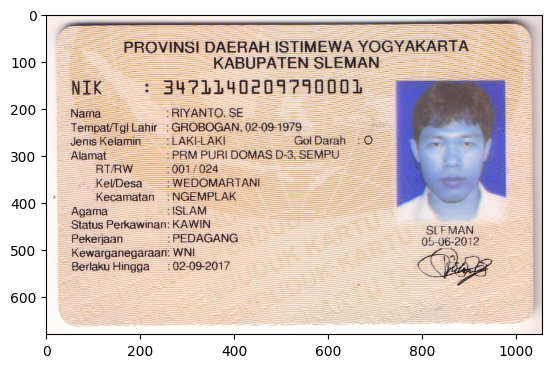

In [7]:
img = cv.imread("/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp.png")
plt.imshow(img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

PROVINSI BENGKULU
KOTA BENGKULU

NIK 2 19791012101430002

Nama
Tempat/TgI Lahir
Jenis Kelamin
Alamat

RTRW
KevDesa
Kecamatan

Agama
Status Perkawinan :

Kewarganegaraan:
Berlaku Hingga:

: GALANG RAKA PRATAMA

: BENGKULU, 24-01-1993

# LAKI-LAKI Gol. Darah : A
1 JLUNIB PERMA III NO 35

PERUMNAS UNIB

1015 / 003
: PEMATANG GUBERNUR
: MUARA BANGKAHULU
ISLAM sk
BELUM KAWIN KOTA BENGKULU
: PELAJAR/MAHASISWA —

WNI 212
24-01-2017 AA La



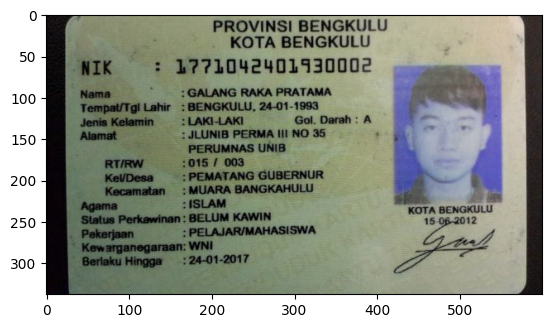

In [8]:
img = cv.imread("/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp1.png")
plt.imshow(img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

 
 
  

. PROVINSI BENGKULU
H... KOTA BENGKULU

Low YO) 130902

 

 



Text(0.5, 1.0, 'Thresholded Image')

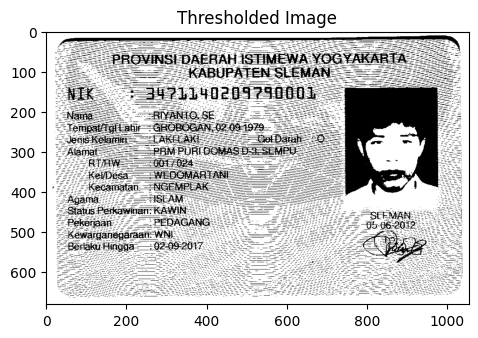

In [22]:
# Load the image
img = cv.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp.png')

# Perform Otsu thresholding
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, binary = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)


text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

# Display the thresholded image
plt.figure(figsize=(12, 10))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Thresholded Image')
